In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras import layers, models
import requests
from io import BytesIO
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [2]:
# Загрузка и подготовка данных
from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/My Drive/Project/DataSetCyrillic"

Mounted at /content/drive


In [3]:
# размер изображений 28 на 28 => входной вектор длины 784
labels = []
images = []

for folder in os.listdir(data_path):
  #print(folder)
  for filename in os.listdir(os.path.join(data_path, folder)):
      img_path = os.path.join(data_path, folder, filename)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      img = img / 255  # Нормализация значений пикселей
      if (folder == '-'):
        label = 66
      elif (folder == '!'):
        label = 67
      elif (folder == '#'):
        label = 68
      elif (folder == '$'):
        label = 69
      elif (folder == '%'):
        label = 70
      elif (folder == '('):
        label = 71
      elif (folder == ')'):
        label = 72
      elif (folder == ','):
        label = 73
      elif (folder == ';'):
        label = 74
      elif (folder == '@'):
        label = 75
      elif (folder == '['):
        label = 76
      elif (folder == ']'):
        label = 77
      elif (folder == '^'):
        label = 78
      elif (folder == '~'):
        label = 79
      elif (folder == '+'):
        label = 80
      elif (folder == '='):
        label = 81
      elif (folder == '0'):
        label = 82
      elif (folder == '1'):
        label = 83
      elif (folder == '2'):
        label = 84
      elif (folder == '3'):
        label = 85
      elif (folder == '4'):
        label = 86
      elif (folder == '5'):
        label = 87
      elif (folder == '6'):
        label = 88
      elif (folder == '7'):
        label = 89
      elif (folder == '8'):
        label = 90
      elif (folder == '9'):
        label = 91
      elif (folder == '№'):
        label = 92
      elif (folder == 'амперсант'):
        label = 93
      elif (folder == 'больше'):
        label = 94
      elif (folder == 'вопрос'):
        label = 95
      elif (folder == 'двоеточие'):
        label = 96
      elif (folder == 'звёздочка'):
        label = 97
      elif (folder == 'кавычки'):
        label = 98
      elif (folder == 'меньше'):
        label = 99
      elif (folder == 'слеш'):
        label = 100
      elif (folder == 'пробел'):
        label = 101
      elif (folder == 'прямой слеш'):
        label = 102
      elif (folder == 'обратный слеш'):
        label = 103
      elif (folder == 'точка'):
        label = 104
      elif (folder == 'фигурная скобка откр'):
        label = 105
      elif (folder == 'фигурная скобка закр'):
        label = 106
      else:
        label = ord(folder[0]) - ord('А')
      images.append(img)
      labels.append(label)
  '''for filename in os.listdir(os.path.join(data_path, folder)):
      img_path = os.path.join(data_path, folder, filename)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      img = img / 255  # Нормализация значений пикселей
      label = ord(folder[0]) - ord('А')
      images.append(img)
      labels.append(label)'''

In [4]:
# Преобразование в массив numpy
images = np.array(images)
labels = np.array(labels)

In [5]:
# Разделение данных на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [6]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [19]:
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Добавлен сверточный слой
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(428, activation='relu'))  # скрытый слой 128 нейронов
model.add(Dropout(0.5))  # Добавлен слой Dropout
model.add(layers.Dense(107, activation='softmax'))  # выходной 63 нейрона (33 буквы, из них все, кроме ъ, ы, ь в двух вариантах (большая и маленькая))
# 66 для краткости

#print(model.summary())

In [20]:
#model.build(input_shape=(28730, 28, 28, 1))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train, batch_size=107, epochs=50, validation_split=0.2)

Epoch 1/50
172/172 [==============================] - 18s 99ms/step - loss: 4.2277 - accuracy: 0.0505 - val_loss: 3.7143 - val_accuracy: 0.1405
Epoch 2/50
172/172 [==============================] - 17s 99ms/step - loss: 3.4172 - accuracy: 0.1620 - val_loss: 2.8799 - val_accuracy: 0.3280
Epoch 3/50
172/172 [==============================] - 17s 100ms/step - loss: 2.8065 - accuracy: 0.2809 - val_loss: 2.3437 - val_accuracy: 0.4640
Epoch 4/50
172/172 [==============================] - 19s 108ms/step - loss: 2.3707 - accuracy: 0.3758 - val_loss: 1.9442 - val_accuracy: 0.5541
Epoch 5/50
172/172 [==============================] - 16s 94ms/step - loss: 2.0580 - accuracy: 0.4504 - val_loss: 1.7056 - val_accuracy: 0.5902
Epoch 6/50
172/172 [==============================] - 16s 95ms/step - loss: 1.8324 - accuracy: 0.5002 - val_loss: 1.4917 - val_accuracy: 0.6380
Epoch 7/50
172/172 [==============================] - 18s 102ms/step - loss: 1.6398 - accuracy: 0.5437 - val_loss: 1.3217 - val_accura

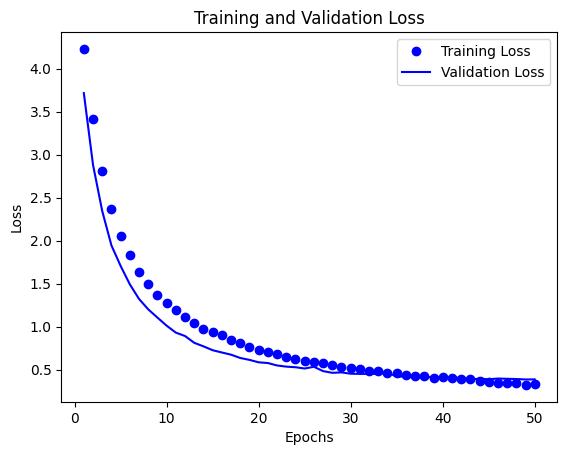

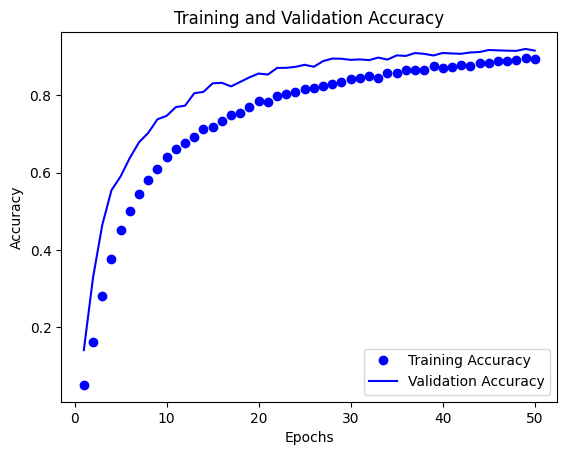

In [22]:
# Получение данных обучения
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Построение графиков
epochs = range(1, len(train_loss) + 1)

# График функции потерь
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# График точности
plt.clf()
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 22ms/step
[[3.96045444e-19 1.91401428e-16 3.26622427e-15 2.64904844e-22
  3.78491499e-22 1.85401084e-21 1.00390633e-28 1.03344457e-14
  7.39855225e-23 9.37368451e-23 1.73963863e-19 1.46069773e-20
  5.26182126e-27 1.73562647e-21 7.32821905e-15 1.05403177e-23
  5.09470507e-18 3.45418911e-17 6.31878847e-23 3.24857052e-28
  8.70995713e-13 5.60462061e-27 1.98842649e-28 5.94131577e-25
  1.20602478e-18 1.74206461e-24 6.77947752e-25 2.21462740e-24
  1.40116732e-23 1.68878865e-17 1.62863811e-19 1.85606128e-23
  9.90862846e-01 6.60896831e-06 5.60758682e-03 3.48431115e-07
  3.28430142e-05 4.88981368e-06 5.11356199e-22 1.11520202e-13
  2.54995448e-05 2.99588073e-25 5.24579580e-09 1.20374599e-09
  1.97712896e-18 7.15698710e-15 3.41052143e-03 4.88965779e-05
  1.37689624e-13 1.19846817e-08 9.53578189e-12 3.01759890e-21
  9.66430457e-15 2.60755218e-21 1.46247048e-09 6.05200568e-14
  1.17721024e-12 7.65665184e-15 3.57149854e-17 2.71175013e-18
  1.12682730e-09 6

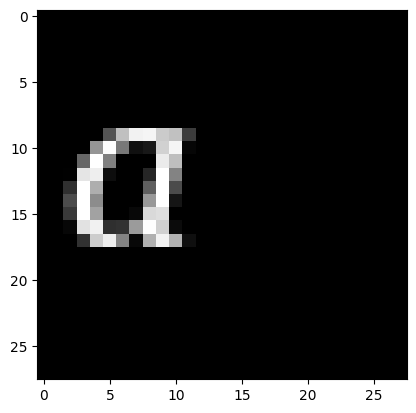

In [24]:
n = 5
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
if (65 < int(np.argmax(res)) < 107):
  if (int(np.argmax(res)) == 66):
    print('-')
  elif (int(np.argmax(res)) == 67):
    print('!')
  elif (int(np.argmax(res)) == 68):
    print('#')
  elif (int(np.argmax(res)) == 69):
    print('$')
  elif (int(np.argmax(res)) == 70):
    print('%')
  elif (int(np.argmax(res)) == 71):
    print('(')
  elif (int(np.argmax(res)) == 72):
    print(')')
  elif (int(np.argmax(res)) == 73):
    print(',')
  elif (int(np.argmax(res)) == 74):
    print(';')
  elif (int(np.argmax(res)) == 75):
    print('@')
  elif (int(np.argmax(res)) == 76):
    print('[')
  elif (int(np.argmax(res)) == 77):
    print(']')
  elif (int(np.argmax(res)) == 78):
    print('^')
  elif (int(np.argmax(res)) == 79):
    print('~')
  elif (int(np.argmax(res)) == 80):
    print('+')
  elif (int(np.argmax(res)) == 81):
    print('=')
  elif (int(np.argmax(res)) == 82):
    print('0')
  elif (int(np.argmax(res)) == 83):
    print('1')
  elif (int(np.argmax(res)) == 84):
    print('2')
  elif (int(np.argmax(res)) == 85):
    print('3')
  elif (int(np.argmax(res)) == 86):
    print('4')
  elif (int(np.argmax(res)) == 87):
    print('5')
  elif (int(np.argmax(res)) == 88):
    print('6')
  elif (int(np.argmax(res)) == 89):
    print('7')
  elif (int(np.argmax(res)) == 90):
    print('8')
  elif (int(np.argmax(res)) == 91):
    print('9')
  elif (int(np.argmax(res)) == 92):
    print('№')
  elif (int(np.argmax(res)) == 93):
    print('&')
  elif (int(np.argmax(res)) == 94):
    print('<')
  elif (int(np.argmax(res)) == 95):
    print('?')
  elif (int(np.argmax(res)) == 96):
    print(':')
  elif (int(np.argmax(res)) == 97):
    print('*')
  elif (int(np.argmax(res)) == 98):
    print('"')
  elif (int(np.argmax(res)) == 99):
    print('>')
  elif (int(np.argmax(res)) == 100):
    print('\\')
  elif (int(np.argmax(res)) == 101):
    print(' ')
  elif (int(np.argmax(res)) == 102):
    print('|')
  elif (int(np.argmax(res)) == 103):
    print('/')
  elif (int(np.argmax(res)) == 104):
    print('.')
  elif (int(np.argmax(res)) == 105):
    print('{')
  elif (int(np.argmax(res)) == 106):
    print('}')
else:
  print(f'Распознанная буква: {chr(int(np.argmax(res)) + ord("А"))}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [25]:
# serialize model to JSON
model_json = model.to_json()
with open("model_v30.12.23.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_v30.12.23.h5")
print("Saved model to disk")

Saved model to disk
